## This notebook is to learn Gradient Descent, Regression techniques, Regularization and Logistic Regression
#### Manas Dasgupta, 12th July, 2021

In [1]:
## import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Generate a Linear looking dataset to test the Closed-form Normal Equation

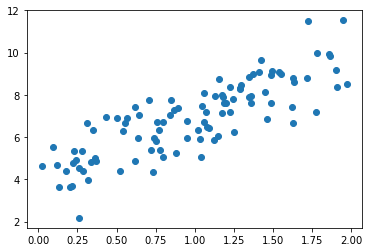

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)

In [4]:
# We apply the closed form Normal Equation 

X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to eah instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.

array([[4.12426174],
       [2.83864649]])

In [5]:
# Making Predictions using the equation using derived θ values

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict   # y_predict is predicted values of 'y' using derived 0. 

array([[4.12426174],
       [9.80155473]])

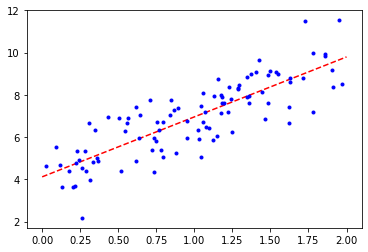

In [6]:
# Compare the distribution of the original X/y values vis-a-vis the predicted values (line)

plt.plot(X_new, y_predict, "r--") 
plt.plot(X, y, "b.")
plt.show()

### Linear Regression using scikit-learn 

In [7]:
from sklearn.linear_model import LinearRegression 

# Create an object of LinearRegression and fit with X, y values from above

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Display the obtained intercept and coefficient values 

lin_reg.intercept_, lin_reg.coef_   

(array([4.12426174]), array([[2.83864649]]))

In [8]:
# Predict using the obtained intercept and coefficients

y_predict_lr = lin_reg.predict(X_new)
y_predict_lr

array([[4.12426174],
       [9.80155473]])

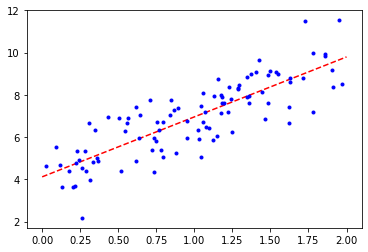

In [9]:
# Compare the distribution of the original X/y values vis-a-vis the predicted values (line)

plt.plot(X_new, y_predict_lr, "r--") 
plt.plot(X, y, "b.")
plt.show()

## Learning Gradient Descent

### Batch Gradient Descent
Batch Gradient Descent uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). Batch Gradient Descent scales well with the increase in number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

In [10]:
eta = 0.1    # learning rate 

n_iterations = 1000 
m = 100

[[0.28255645]
 [2.66893762]]


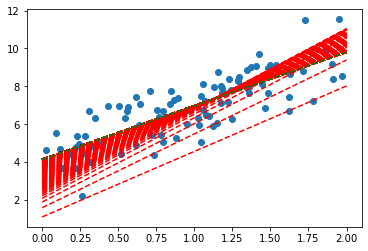

In [11]:
# Observe Gradient Descent process visually plotting 

theta = np.random.randn(2,1)  # random initialization
print(theta)
plt.scatter(X, y)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients
    # Plot Gradient line for x and y using each value of theta and observe how it changes from
    # a randomly initialised value to the optimised value. 
    plt.plot(X_new, X_new_b.dot(theta), "r--")

# Distictinctly show the final best fit line    
plt.plot(X_new, X_new_b.dot(theta), "g--")


[[-0.45451024]
 [-0.34374816]]


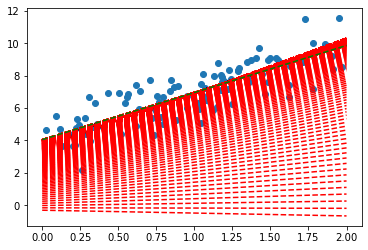

In [12]:
theta = np.random.randn(2,1)  # random initialization
print(theta)
eta = 0.01
plt.scatter(X, y)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients
    # Plot Gradient line for x and y using each value of theta and observe how it changes from
    # a randomly initialised value to the optimised value. 
    plt.plot(X_new, X_new_b.dot(theta), "r--")

# Distictinctly show the final best fit line     
plt.plot(X_new, X_new_b.dot(theta), "g--")


[[0.47051053]
 [1.21994993]]


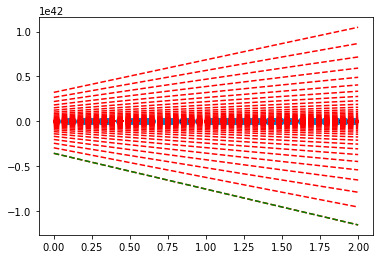

In [13]:
theta = np.random.randn(2,1)  # random initialization
print(theta)
eta = 0.5
plt.scatter(X, y)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients
    # Plot Gradient line for x and y using each value of theta and observe how it changes from
    # a randomly initialised value to the optimised value. 
    plt.plot(X_new, X_new_b.dot(theta), "r--")

# Distictinctly show the final best fit line     
plt.plot(X_new, X_new_b.dot(theta), "g--")


### Stochastic Gradient Descent

Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [15]:
def learning_schedule(t): 
    return t0/(t + t1)

In [16]:
theta = np.random.randn(2,1) # random initialization

In [17]:
for epoch in range(n_epochs): 
    for i in range(m):    # For every data instance
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1] 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients
    

In [18]:
theta

array([[4.12760935],
       [2.80364194]])

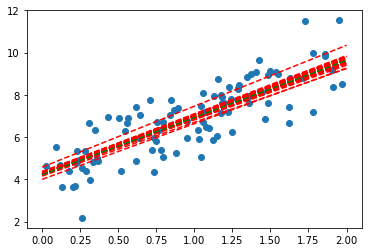

In [19]:
# Observe Stochastic Gradient Descent Visually

plt.scatter(X, y)
eta = 0.05

for epoch in range(n_epochs): 
    for i in range(m):    # For every data instance
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1] 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients
    plt.plot(X_new, X_new_b.dot(theta), "r--") # Plot after each epoch

# Distictinctly show the final best fit line     
plt.plot(X_new, X_new_b.dot(theta), "g--")

### Linear Regression using Stochastic Gradient Descent using scikit-learn library

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17366062]), array([2.93263381]))

In [22]:
# Predict using the obtained intercept and coefficients

y_predict_sgd = lin_reg.predict(X_new)
y_predict_sgd

# Observation: this is same as what we obtained through LinearRegression() method 

array([[4.12426174],
       [9.80155473]])

## Mini-Batch Gradient Descent
In a Mini-batch Gradient Descent, at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini- batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

### CODE???

## Polynomial Regression

What if your data is actually more complex than a simple straight line, you can still use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

In [23]:
# Example of a Quadratic equation

m = 100
X = 4 * np.random.rand(m, 1) - 3
y = 3 * X**2 + X + 2 + np.random.randn(m, 1)

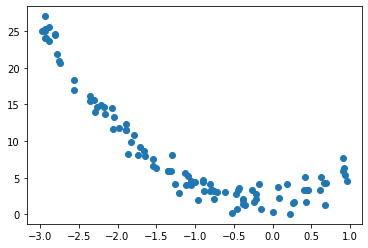

In [24]:
plt.scatter(X, y)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [26]:
print(X[0])
print(X_poly[0])

[0.00631248]
[6.31247903e-03 3.98473915e-05]


In [27]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
pol_reg.intercept_, pol_reg.coef_

(array([2.05526418]), array([[1.11845053, 3.03004708]]))

In [28]:
# Predict using the obtained intercept and coefficients

y_predict_pol = pol_reg.predict(X_poly)
df = pd.DataFrame(list(zip(y_predict_pol, X)))

In [29]:
df = df.sort_values(by=1) 

In [30]:
df

,0,1
94,[25.504415909397984],[-2.972558508572029]
72,[24.976571246104456],[-2.9411398075853024]
95,[24.922229519627123],[-2.93788489029611]
23,[24.85415905537074],[-2.9338022231262264]
66,[24.851397264649066],[-2.933636451014031]
...,...,...
59,[5.559361152877981],[0.9065459552216231]
2,[5.567798372430441],[0.9078212170445328]
53,[5.6328240606997175],[0.9176001582993853]
99,[5.765383035722779],[0.9372711701594456]


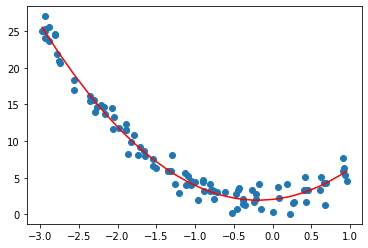

In [31]:
# Plot Polynomial Regression - original points vs predicted line

plt.scatter(X, y)
plt.plot(df[1], df[0], c='r')

## Learning Curves
learning curves are model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [33]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) 
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

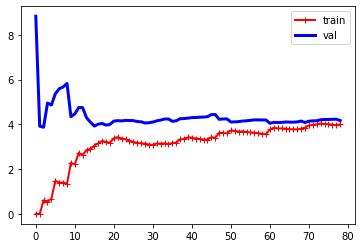

In [34]:
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, X, y)

#### Now let’s look at the learning curves of a 10th-degree polynomial model on the same data

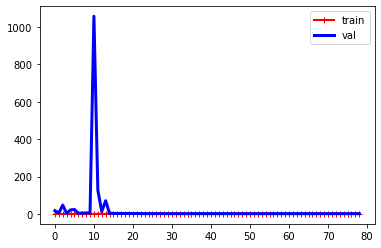

In [35]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
        ("lin_reg", LinearRegression()),]) 

plot_learning_curves(polynomial_regression, X, y)
plt.legend()

## Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to α∑n θ 2 is added to the cost function.

In [36]:
X

array([[ 0.00631248],
       [-2.74333837],
       [ 0.90782122],
       [ 0.06773682],
       [-0.51775615],
       [-0.44285249],
       [-0.26931173],
       [-2.80115368],
       [-0.75050676],
       [-2.88098495],
       [ 0.25985878],
       [-0.38134939],
       [-2.56458109],
       [-2.06901712],
       [ 0.6179895 ],
       [ 0.45916366],
       [-1.9848249 ],
       [-1.88960324],
       [-0.47202373],
       [-1.8317762 ],
       [ 0.63138385],
       [-1.31562798],
       [-1.1153901 ],
       [-2.93380222],
       [ 0.43440476],
       [-1.09072986],
       [-1.89283863],
       [-1.86262938],
       [-0.90230086],
       [ 0.41725777],
       [-1.04857424],
       [-0.43726145],
       [-2.35697562],
       [-2.91671856],
       [-0.88964012],
       [-0.78134712],
       [-0.81191468],
       [-2.88994926],
       [-2.16623943],
       [-0.75421941],
       [-1.29641661],
       [-1.12584929],
       [ 0.95517629],
       [ 0.69225817],
       [ 0.40115539],
       [-2

In [37]:
y

array([[ 0.38173636],
       [20.61148893],
       [ 5.9378011 ],
       [ 3.76798152],
       [ 0.15442645],
       [ 3.35053167],
       [ 3.32791469],
       [24.44128344],
       [ 3.22823791],
       [23.61909765],
       [ 1.49853363],
       [ 1.96930567],
       [18.27331038],
       [14.52501286],
       [ 3.33441085],
       [ 3.39091917],
       [11.84176502],
       [11.47978385],
       [ 2.83529562],
       [ 9.86809748],
       [ 5.05661218],
       [ 5.97352629],
       [ 3.95996693],
       [25.2712759 ],
       [ 1.76839877],
       [ 5.18801642],
       [11.57299985],
       [ 8.28438128],
       [ 4.67132779],
       [ 5.04722617],
       [ 4.50861517],
       [ 3.61604284],
       [15.41974172],
       [24.01513623],
       [ 3.19740091],
       [ 3.28393113],
       [ 4.18268682],
       [25.51762425],
       [13.66249101],
       [ 2.07555599],
       [ 8.11320002],
       [ 5.67484872],
       [ 4.54730142],
       [ 4.29017344],
       [ 3.34215117],
       [15

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[-5.3323148]])

In [39]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())   # ravel() returns a flattened array
sgd_reg.predict([[1.5]])

array([-5.38912854])

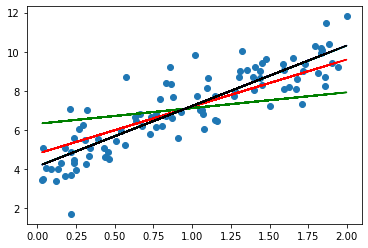

In [40]:
# Observe Ridge Regression Visually

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
alpha = [0, 10, 100, 0.1, 0.001]
color = ['b', 'r', 'g', 'c', 'k']
for c, e in enumerate(alpha):
    ridge_reg = Ridge(alpha=e, solver="cholesky")
    ridge_reg.fit(X, y)
    yi = np.array([])
    
    for i, x in enumerate(X):
        yi = np.append(yi, ridge_reg.predict([x]))
    
    plt.plot(X, yi, c=color[c])

In [41]:
x

array([1.14837997])

## Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.
Lasso Regression cost function Jθ =MSEθ +α∑n θ i=1 i

In [42]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.61756593])

In [43]:
# Using SGDRegressor 

lasso_sgd = SGDRegressor(penalty="l1")
lasso_sgd.fit(X, y.ravel())   # ravel() returns a flattened array
lasso_sgd.predict([[1.5]])

array([8.85715987])

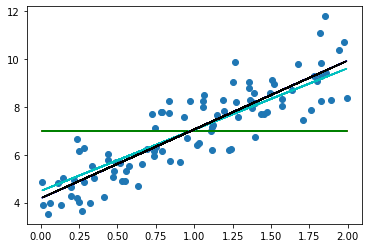

In [44]:
# Observe Lasso Regression Visually

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
alpha = [0, 10, 100, 0.1, 0.001]
color = ['b', 'r', 'g', 'c', 'k']
for c, e in enumerate(alpha):
    lasso_reg = Lasso(alpha=e)
    lasso_reg.fit(X, y)
    yi = np.array([])
    
    for i, x in enumerate(X):
        yi = np.append(yi, lasso_reg.predict([x]))
    
    plt.plot(X, yi, c=color[c])

## Elastic Net

#### Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

In [45]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.22853856])

## Early Stopping

#### A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. With early stop‐ ping you just stop training as soon as the validation error reaches the minimum.

In [46]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train) 
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, 
                       learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf") 
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    print(val_error)   # Observe the gradual minimisation of MSE
    if val_error < minimum_val_error:
        minimum_val_error = val_error 
        best_epoch = epoch 
        best_model = clone(sgd_reg)

50.217270588416625
68.36570848940916
88.84470745463231
64.00985733829748
64.71826689130555
50.6800887580083
39.67719875123575
35.71642086483207
25.793388747937804
23.72524245041551
21.619838338813018
24.05859862877293
34.004572083213475
44.8128407230041
46.1002237261729
58.85330050299159
81.44727779933292
98.84274477543829
106.81638281342796
110.27240971246897
149.72170212812208
254.24752754327247
327.00198407316987
385.62069391428946
490.38338301008787
535.5334752199416
717.8518940956668
975.7594344762556
1220.9990254244965
2881.5859028123477
2296.5071550917633
2780.194681120888
4729.73898363648
4822.756784836866
5887.158248807682
11969.716056356654
11371.395502082181
13439.775514228677
17074.661918572732
28871.732530898465
32590.24004221689
38916.084578278
55614.278796653714
57637.32889886155
75267.76875843335
90411.54396164532
119414.9190557518
148493.74133864793
219369.06869638484
234695.73208558667
313691.71897121577
463203.0418270047
502471.11926397757
833640.8039272747
943209.19

1.018158558721572e+22
1.775714831955487e+22
1.7510941454536639e+22
2.183522196136298e+22
2.842443049278735e+22
3.823502783251328e+22
1.6173785800228039e+22
4.516562752823219e+22
1.7911703344583012e+22
2.0578168090562023e+22
2.104282263761789e+22
5.012783714143193e+22
1.4705507361690187e+22
2.5141922391410115e+22
2.6157387011252564e+22
3.766875540655831e+22
3.962299128495628e+22
5.60880679714002e+22
5.886578591942165e+22
5.551518860880634e+22
4.303651687345875e+22
6.146044426693552e+22
1.0821796556610162e+22
3.4148787964264315e+22
2.164048733184506e+22
2.0748749839027986e+22
1.7795672285568385e+22
3.176836055220321e+22
2.9611890285347177e+22
1.988634264722621e+22
4.028284278693409e+22
3.80319714600686e+22
1.7412257919107043e+22
3.5727777989980343e+22
3.041169869949223e+22
5.3665926168565976e+22
1.1883919811063518e+22
2.989303878631968e+22
2.185406072227609e+22
1.8155071506678607e+22
1.953387574648013e+22
2.731982224609873e+22
2.311156901279394e+22
2.090712187934718e+22
2.202268880871713

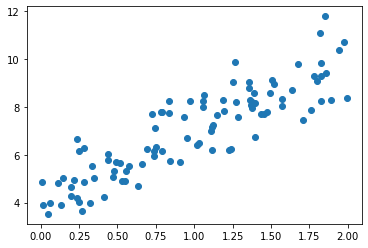

In [47]:
plt.scatter(X, y)

In [48]:
best_model.fit(X_train_poly_scaled, y_train)
predo = best_model.predict(X_val_poly_scaled)

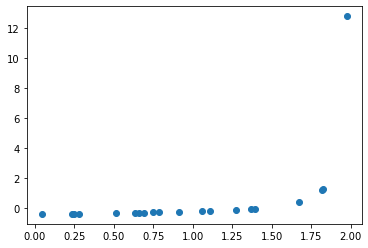

In [49]:
plt.scatter(X_val, predo)

## Logistic Regression
Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”).

#### The Iris dataset experiment

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

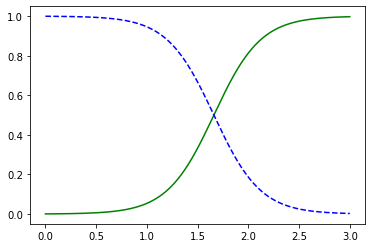

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [54]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax
Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead.

In [55]:
X = iris["data"][:, (2, 3)] # petal length, petal width 
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) 
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [56]:
softmax_reg.predict([[5, 2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5, 2]]) 

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Support Vector Machine (SVM)
The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the LinearSVC class with C = 1 and the hinge loss function) to detect Iris-Virginica flowers.

In [58]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

In [59]:
iris = datasets.load_iris()
irispetals = pd.DataFrame(iris["data"][:, (2, 3)], columns=("petallength", "petalwidth"))
irispetals["target"] = iris["target"]
irispetals

,petallength,petalwidth,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


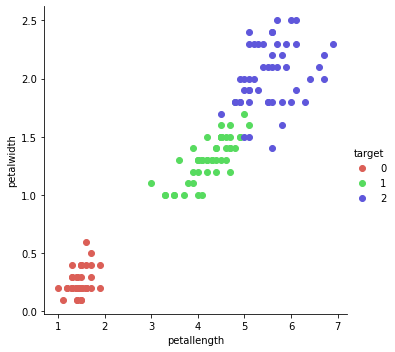

In [60]:
sns.FacetGrid(irispetals, hue="target", palette="hls", size=5) \
   .map(plt.scatter, "petallength", "petalwidth") \
   .add_legend()

In [61]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Create a Pipeline with StandardScaler and LinearSVC Objects

In [62]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")), ])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

### Predict 

In [63]:
# Test for Iris-Virginica and Other

print(svm_clf.predict([[5.5, 1.7]]))
print(svm_clf.predict([[4.4, 1.2]]))
print(svm_clf.predict([[2.1, 0.4]]))

[1.]
[0.]
[0.]


### Some Alternatives

- Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it is much slower, especially with large training sets, so it is not recommended. 
- Another option is to use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core train‐ ing), or to handle online classification tasks.

### Non-linear-SVC Classification

In [64]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### Import the Moons Dataset

In [113]:
X, y = datasets.make_moons(n_samples=100, noise=0.1)

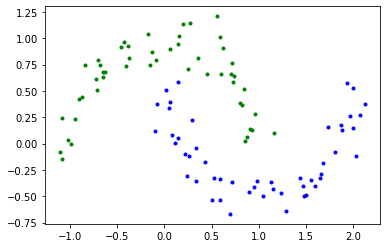

In [114]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g.")
plt.show()

In [115]:
y==1

array([ True,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False,  True,
       False])

### Insert a Polynomial Feature of Degree 3 and run the Linear SVC

In [68]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)), 
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ]) 
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [69]:
print(polynomial_svm_clf.predict([[0.5, -0.6]]))
print(polynomial_svm_clf.predict([[0.6, 1]]))
print(polynomial_svm_clf.predict([[1.5, 0.75]]))
print(polynomial_svm_clf.predict([[0.5, 0.5]]))

[1]
[0]
[0]
[0]


### Using the Polynomial Kernel Trick
No need to insert the Polynomial Feature

In [70]:
from sklearn.svm import SVC 

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) ])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [71]:
print(polynomial_svm_clf.predict([[0.5, -0.6]]))
print(polynomial_svm_clf.predict([[0.6, 1]]))
print(polynomial_svm_clf.predict([[1.5, 0.75]]))
print(polynomial_svm_clf.predict([[0.5, 0.5]]))

[1]
[0]
[0]
[0]


## WRITE DECISION BUNDARY CODES

### SVM Regression
The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

In [72]:
from sklearn.svm import LinearSVR 
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [73]:
svm_reg.predict([[5.5, 1.7]])

array([0.])

### Poly - SVR

The following code produces a polynomial SVR model using Scikit-Learn’s SVR class (which supports the kernel trick). The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. 
The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).

In [74]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [75]:
svm_poly_reg.predict([[5.5, 1.7]])

array([-3.34525957])

### Decision Trees

In [76]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [77]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width 
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2) 
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

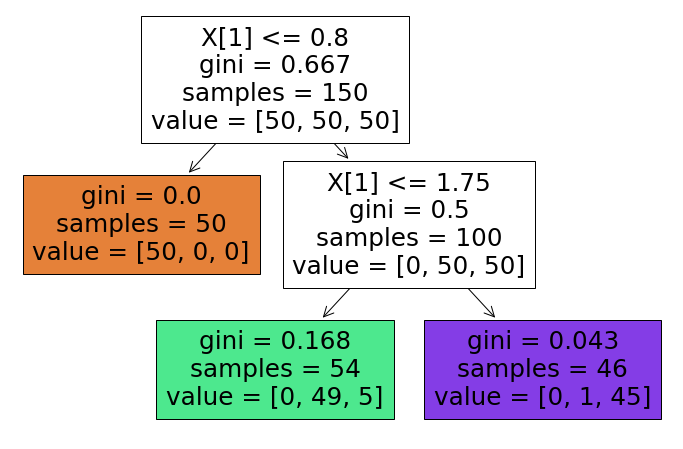

In [78]:
# Prepare a plot figure with set size.
plt.figure(figsize = (12,8))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(tree_clf, 
          filled=True      )
# Display the tree plot figure.
plt.show()

In [79]:
tree_clf.predict([[5, 1.5]])

array([1])

In [80]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

### CART Algorithm

In [81]:
# ??

### Decision Tree Regression

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
tree_reg = DecisionTreeRegressor(max_depth=2) 
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [84]:
tree_reg.predict([[5, 1.5]])

array([1.09259259])

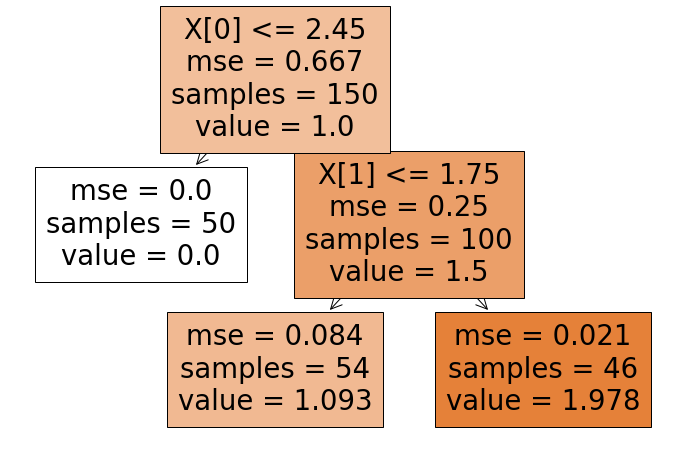

In [85]:
# Prepare a plot figure with set size.
plt.figure(figsize = (12,8))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(tree_reg, 
          filled=True      )
# Display the tree plot figure.
plt.show()

## Random Forests - Ensemble Learning

#### Creating a Voting Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

In [87]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width 
y = iris.target

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [89]:
# Creating a Logistic Regressor Object, a Random Forest Classifier object and a SV Classifier Object

log_clf = LogisticRegression() 
rnd_clf = RandomForestClassifier() 
svm_clf = SVC()

In [90]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [91]:
# Compare the performance of the indovidual classifiers and Voting Classifier by predicting using Test set

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9666666666666667
RandomForestClassifier 1.0
SVC 0.9333333333333333
VotingClassifier 0.9666666666666667


In [92]:
# Compare the performance of the indovidual classifiers and Voting Classifier by predicting using Train set

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_train, y_pred))

LogisticRegression 0.975
RandomForestClassifier 0.9916666666666667
SVC 0.9666666666666667
VotingClassifier 0.975


### Decision Tree Regression

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
tree_reg = DecisionTreeRegressor(max_depth=2) 
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [95]:
tree_reg.predict([[5, 1.5]])

array([1.09259259])

### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train) 
y_pred_rf = rnd_clf.predict(X_test)

In [97]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier( DecisionTreeClassifier(splitter="random", max_leaf_nodes=16), 
                            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

## Naive Bayes

### Gaussian Naive Bayes

#### We create a dummy Gaussian Distribution Sample with 2 categories and use a GaussianNB Classifier to Classify it. The assumption is that data from each label is drawn from a simple Gaussian distribution. 

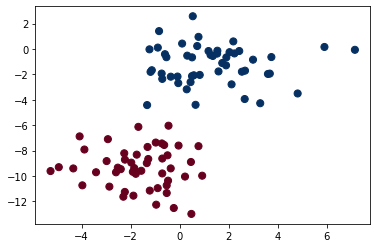

In [98]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [99]:
# Create the GaussianNB Model object and Fit.

from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [100]:
# Create a Test data sample and predict. 

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

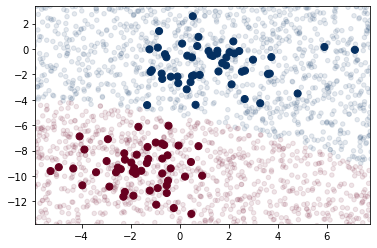

In [101]:
# Plot this new data to get an idea of where the decision boundary is

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [102]:
yprob = model.predict_proba(Xnew)
yprob[:100].round(3)

array([[0.   , 1.   ],
       [0.001, 0.999],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.002, 0.998],
       [0.   , 1.   ],
       [0.94 , 0.06 ],
       [0.   , 1.   ],
       [0.004, 0.996],
       [0.013, 0.987],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.984, 0.016],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.556, 0.444],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1. 

#### The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

### Multinomial Naive Bayes

#### In Multinomial Naiyve Bayes, the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

In [103]:
# Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might 
# classify these short documents into categories.

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [104]:
# Select just a few of these categories, and download the training and testing set.

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
                  'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [105]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [106]:
# Here we use the TF–IDF vector‐ izer and create a pipeline that attaches it to a 
# multinomial naive Bayes classifier.

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [107]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

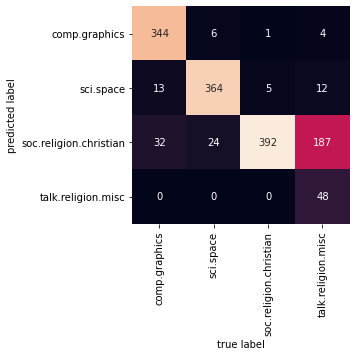

In [108]:
# Build the confusion matrix between the true and predicted labels for the test data.

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [109]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s])
    return train.target_names[pred[0]] 

In [110]:
predict_category('Rocket Launch from Kennedy Centre')

'sci.space'

In [111]:
predict_category('Islam is one of the oldest')

'soc.religion.christian'

In [112]:
predict_category('Screen resolution is low')

'comp.graphics'